In [37]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve
from sklearn.metrics import classification_report

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, GRU, Dropout, Activation, Bidirectional, Conv2D, MaxPooling2D
from keras import optimizers
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping

In [12]:
data = datasets.load_digits()

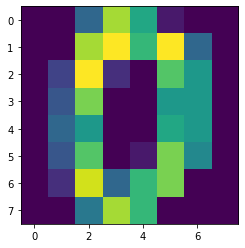

label:  0


In [13]:
plt.imshow(data.images[0])    # show first number in the dataset
plt.show()
print('label: ', data.target[0])    # label = '0'

In [14]:
X_data = data.images
y_data = data.target

In [15]:
# shape of data
print(X_data.shape)    # (8 X 8) format
print(y_data.shape)

(1797, 8, 8)
(1797,)


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 777)

In [104]:
y_trainCat = to_categorical(y_train)
y_testCat = to_categorical(y_test)

In [105]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1437, 8, 8)
(360, 8, 8)
(1437,)
(360,)


## 1. Simple RNN model

In [106]:
def simple_rnn_model():
    adam = optimizers.Adam(lr = 0.001, decay=1e-6)
    model = Sequential()
    model.add(SimpleRNN(10, input_shape = (8,8)))
    model.add(Activation('softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [107]:
# simple_rnn_model = KerasClassifier(build_fn = simple_rnn_model, epochs = 100, batch_size = 25, verbose = 1)

In [108]:
simple_rnn_model = simple_rnn_model()

In [109]:
# kfold = StratifiedKFold(n_splits=3, shuffle = True, random_state = 777)    # 10-fold cross validation

In [110]:
# cross validate the results
# results = cross_val_score(simple_rnn_model, X_train, y_train, cv = kfold)

In [111]:
simple_rnn_model.fit(X_train, y_trainCat, epochs=500, validation_split=0.1, callbacks=[EarlyStopping(patience=10)])

Train on 1293 samples, validate on 144 samples
Epoch 1/500
1293/1293 [==============================] - 0s 320us/step - loss: 2.6414 - accuracy: 0.0913 - val_loss: 2.6663 - val_accuracy: 0.0903
Epoch 2/500
1293/1293 [==============================] - 0s 108us/step - loss: 2.5657 - accuracy: 0.0789 - val_loss: 2.5970 - val_accuracy: 0.1111
Epoch 3/500
1293/1293 [==============================] - 0s 107us/step - loss: 2.4975 - accuracy: 0.0820 - val_loss: 2.5321 - val_accuracy: 0.1111
Epoch 4/500
1293/1293 [==============================] - 0s 108us/step - loss: 2.4319 - accuracy: 0.0789 - val_loss: 2.4534 - val_accuracy: 0.1319
Epoch 5/500
1293/1293 [==============================] - 0s 106us/step - loss: 2.3591 - accuracy: 0.0882 - val_loss: 2.3417 - val_accuracy: 0.1458
Epoch 6/500
1293/1293 [==============================] - 0s 111us/step - loss: 2.2796 - accuracy: 0.1036 - val_loss: 2.2637 - val_accuracy: 0.1528
Epoch 7/500
1293/1293 [==============================] - 0s 111us/step 

1293/1293 [==============================] - 0s 113us/step - loss: 1.5942 - accuracy: 0.5275 - val_loss: 1.6339 - val_accuracy: 0.5000
Epoch 57/500
1293/1293 [==============================] - 0s 105us/step - loss: 1.5828 - accuracy: 0.5414 - val_loss: 1.6313 - val_accuracy: 0.5208
Epoch 58/500
1293/1293 [==============================] - 0s 108us/step - loss: 1.5738 - accuracy: 0.5476 - val_loss: 1.6281 - val_accuracy: 0.5139
Epoch 59/500
1293/1293 [==============================] - 0s 108us/step - loss: 1.5668 - accuracy: 0.5422 - val_loss: 1.6149 - val_accuracy: 0.5139
Epoch 60/500
1293/1293 [==============================] - 0s 114us/step - loss: 1.5570 - accuracy: 0.5545 - val_loss: 1.6110 - val_accuracy: 0.5069
Epoch 61/500
1293/1293 [==============================] - 0s 102us/step - loss: 1.5496 - accuracy: 0.5530 - val_loss: 1.6067 - val_accuracy: 0.5069
Epoch 62/500
1293/1293 [==============================] - 0s 94us/step - loss: 1.5456 - accuracy: 0.5538 - val_loss: 1.5963 -

1293/1293 [==============================] - 0s 104us/step - loss: 1.2881 - accuracy: 0.6891 - val_loss: 1.2978 - val_accuracy: 0.6806
Epoch 112/500
1293/1293 [==============================] - 0s 113us/step - loss: 1.2835 - accuracy: 0.6837 - val_loss: 1.2982 - val_accuracy: 0.6875
Epoch 113/500
1293/1293 [==============================] - 0s 121us/step - loss: 1.2820 - accuracy: 0.6860 - val_loss: 1.3033 - val_accuracy: 0.6944
Epoch 114/500
1293/1293 [==============================] - 0s 116us/step - loss: 1.2781 - accuracy: 0.6891 - val_loss: 1.3068 - val_accuracy: 0.7014
Epoch 115/500
1293/1293 [==============================] - 0s 135us/step - loss: 1.2783 - accuracy: 0.6906 - val_loss: 1.2994 - val_accuracy: 0.7083
Epoch 116/500
1293/1293 [==============================] - 0s 118us/step - loss: 1.2766 - accuracy: 0.6914 - val_loss: 1.2902 - val_accuracy: 0.6944
Epoch 117/500
1293/1293 [==============================] - 0s 115us/step - loss: 1.2721 - accuracy: 0.6984 - val_loss: 1

In [112]:
y_pred = simple_rnn_model.predict(X_test)

In [113]:
y_pred = np.argmax(y_pred, axis=1)

In [121]:
def resultReport(y_pred):
    clasificationreport = classification_report(y_test,y_pred)
    fpr, tpr, threshold = roc_curve(y_test, y_pred, pos_label=2)
    aucScore = auc(fpr, tpr)
    print('Classification Report:\n',clasificationreport)
    print('AUC:', aucScore)

In [122]:
resultReport(y_pred)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        38
           1       0.57      0.44      0.50        36
           2       0.65      0.69      0.67        32
           3       0.40      0.63      0.49        27
           4       0.71      0.84      0.77        32
           5       0.72      0.43      0.54        42
           6       0.80      0.89      0.84        36
           7       0.68      0.87      0.76        39
           8       0.74      0.65      0.69        40
           9       0.74      0.45      0.56        38

    accuracy                           0.69       360
   macro avg       0.69      0.69      0.67       360
weighted avg       0.70      0.69      0.68       360

AUC: 0.3249809451219512


In [12]:
# print out mean and standard deviation of accuracy results
print(results.mean())
print(results.std())

0.4640928477048874
0.10121539649711107


###  2. Stacked RNN model

In [123]:
# 2 layer vanilla RNN Model
def stacked_rnn_model():
    adam = optimizers.Adam(lr = 0.01)
    model = Sequential()
    model.add(SimpleRNN(10, return_sequences = True, input_shape = (8,8)))
    model.add(SimpleRNN(10))
    model.add(Activation('softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [14]:
# stacked_rnn_model = KerasClassifier(build_fn = stacked_rnn_model, epochs = 100, batch_size = 25, verbose = 1)

In [124]:
stacked_rnn_model = stacked_rnn_model()

In [15]:
# kfold = StratifiedKFold(n_splits=5, shuffle = True, random_state = 777)    # 5-fold cross validation

In [16]:
# cross validate the results
# results = cross_val_score(stacked_rnn_model, X_train, y_train, cv = kfold)

Epoch 1/100
1149/1149 [==============================] - 1s 626us/step - loss: 2.0585 - accuracy: 0.3098
Epoch 2/100
1149/1149 [==============================] - 0s 204us/step - loss: 1.7464 - accuracy: 0.4299
Epoch 3/100
1149/1149 [==============================] - 0s 211us/step - loss: 1.6007 - accuracy: 0.5509
Epoch 4/100
1149/1149 [==============================] - 0s 219us/step - loss: 1.5128 - accuracy: 0.6005
Epoch 5/100
1149/1149 [==============================] - 0s 217us/step - loss: 1.4436 - accuracy: 0.6597
Epoch 6/100
1149/1149 [==============================] - 0s 238us/step - loss: 1.4092 - accuracy: 0.6876
Epoch 7/100
1149/1149 [==============================] - 0s 225us/step - loss: 1.3709 - accuracy: 0.7050
Epoch 8/100
1149/1149 [==============================] - 0s 222us/step - loss: 1.3298 - accuracy: 0.7337
Epoch 9/100
1149/1149 [==============================] - 0s 240us/step - loss: 1.3121 - accuracy: 0.7380
Epoch 10/100
1149/1149 [==============================]

1149/1149 [==============================] - 0s 209us/step - loss: 1.1030 - accuracy: 0.8399
Epoch 55/100
1149/1149 [==============================] - 0s 212us/step - loss: 1.1097 - accuracy: 0.8381
Epoch 56/100
1149/1149 [==============================] - 0s 215us/step - loss: 1.1132 - accuracy: 0.8285
Epoch 57/100
1149/1149 [==============================] - 0s 205us/step - loss: 1.0976 - accuracy: 0.8416
Epoch 58/100
1149/1149 [==============================] - 0s 212us/step - loss: 1.1350 - accuracy: 0.8077
Epoch 59/100
1149/1149 [==============================] - 0s 208us/step - loss: 1.1136 - accuracy: 0.8407
Epoch 60/100
1149/1149 [==============================] - 0s 210us/step - loss: 1.1012 - accuracy: 0.8425
Epoch 61/100
1149/1149 [==============================] - 0s 216us/step - loss: 1.1227 - accuracy: 0.8181
Epoch 62/100
1149/1149 [==============================] - 0s 212us/step - loss: 1.1551 - accuracy: 0.7937
Epoch 63/100
1149/1149 [==============================] - 0

1150/1150 [==============================] - 0s 400us/step - loss: 1.3431 - accuracy: 0.7113
Epoch 7/100
1150/1150 [==============================] - 0s 384us/step - loss: 1.3119 - accuracy: 0.7217
Epoch 8/100
1150/1150 [==============================] - 0s 355us/step - loss: 1.3009 - accuracy: 0.7270
Epoch 9/100
1150/1150 [==============================] - 0s 351us/step - loss: 1.3299 - accuracy: 0.6974
Epoch 10/100
1150/1150 [==============================] - 0s 395us/step - loss: 1.2962 - accuracy: 0.7139
Epoch 11/100
1150/1150 [==============================] - 1s 538us/step - loss: 1.2677 - accuracy: 0.7348
Epoch 12/100
1150/1150 [==============================] - 1s 500us/step - loss: 1.2515 - accuracy: 0.7435
Epoch 13/100
1150/1150 [==============================] - 1s 568us/step - loss: 1.2585 - accuracy: 0.7391
Epoch 14/100
1150/1150 [==============================] - 1s 477us/step - loss: 1.2428 - accuracy: 0.7487
Epoch 15/100
1150/1150 [==============================] - 1s 4

1150/1150 [==============================] - 0s 397us/step - loss: 1.1046 - accuracy: 0.8322
Epoch 84/100
1150/1150 [==============================] - 0s 408us/step - loss: 1.0752 - accuracy: 0.8400
Epoch 85/100
1150/1150 [==============================] - 0s 405us/step - loss: 1.1344 - accuracy: 0.8226
Epoch 86/100
1150/1150 [==============================] - 0s 396us/step - loss: 1.0957 - accuracy: 0.8435
Epoch 87/100
1150/1150 [==============================] - 0s 396us/step - loss: 1.0677 - accuracy: 0.8548
Epoch 88/100
1150/1150 [==============================] - 1s 440us/step - loss: 1.0641 - accuracy: 0.8530
Epoch 89/100
1150/1150 [==============================] - 0s 433us/step - loss: 1.1867 - accuracy: 0.7878
Epoch 90/100
1150/1150 [==============================] - 0s 409us/step - loss: 1.1884 - accuracy: 0.7843
Epoch 91/100
1150/1150 [==============================] - 0s 415us/step - loss: 1.1241 - accuracy: 0.8183
Epoch 92/100
1150/1150 [==============================] - 0

In [126]:
stacked_rnn_model.fit(X_train, y_trainCat, epochs=500, callbacks=[EarlyStopping(patience=5)])

Epoch 1/500
1437/1437 [==============================] - 1s 523us/step - loss: 2.0589 - accuracy: 0.2763
Epoch 2/500
1056/1437 [=====================>........] - ETA: 0s - loss: 1.6402 - accuracy: 0.5597

C:\Users\Vishal Kotian\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


1437/1437 [==============================] - 0s 154us/step - loss: 1.6079 - accuracy: 0.5720
Epoch 3/500
1437/1437 [==============================] - 0s 155us/step - loss: 1.4623 - accuracy: 0.6813
Epoch 4/500
1437/1437 [==============================] - 0s 135us/step - loss: 1.3849 - accuracy: 0.7216
Epoch 5/500
1437/1437 [==============================] - 0s 141us/step - loss: 1.3300 - accuracy: 0.7599
Epoch 6/500
1437/1437 [==============================] - 0s 143us/step - loss: 1.2945 - accuracy: 0.7592
Epoch 7/500
1437/1437 [==============================] - 0s 146us/step - loss: 1.2654 - accuracy: 0.7829
Epoch 8/500
1437/1437 [==============================] - 0s 141us/step - loss: 1.2341 - accuracy: 0.8100
Epoch 9/500
1437/1437 [==============================] - 0s 145us/step - loss: 1.2097 - accuracy: 0.8142
Epoch 10/500
1437/1437 [==============================] - 0s 141us/step - loss: 1.2148 - accuracy: 0.7919
Epoch 11/500
1437/1437 [==============================] - 0s 137us

1437/1437 [==============================] - 0s 159us/step - loss: 1.0691 - accuracy: 0.8490
Epoch 80/500
1437/1437 [==============================] - 0s 140us/step - loss: 1.0849 - accuracy: 0.8399
Epoch 81/500
1437/1437 [==============================] - 0s 158us/step - loss: 1.0832 - accuracy: 0.8392
Epoch 82/500
1437/1437 [==============================] - 0s 143us/step - loss: 1.0929 - accuracy: 0.8372
Epoch 83/500
1437/1437 [==============================] - 0s 150us/step - loss: 1.0749 - accuracy: 0.8497
Epoch 84/500
1437/1437 [==============================] - 0s 150us/step - loss: 1.1761 - accuracy: 0.7794
Epoch 85/500
1437/1437 [==============================] - 0s 144us/step - loss: 1.0793 - accuracy: 0.8455
Epoch 86/500
1437/1437 [==============================] - 0s 146us/step - loss: 1.0719 - accuracy: 0.8511
Epoch 87/500
1437/1437 [==============================] - 0s 152us/step - loss: 1.0621 - accuracy: 0.8608
Epoch 88/500
1437/1437 [==============================] - 0

1437/1437 [==============================] - 0s 151us/step - loss: 1.0483 - accuracy: 0.8622
Epoch 156/500
1437/1437 [==============================] - 0s 155us/step - loss: 1.0211 - accuracy: 0.8678
Epoch 157/500
1437/1437 [==============================] - 0s 143us/step - loss: 1.0449 - accuracy: 0.8511
Epoch 158/500
1437/1437 [==============================] - 0s 143us/step - loss: 1.0617 - accuracy: 0.8427
Epoch 159/500
1437/1437 [==============================] - 0s 149us/step - loss: 1.0428 - accuracy: 0.8525
Epoch 160/500
1437/1437 [==============================] - 0s 141us/step - loss: 1.0370 - accuracy: 0.8629
Epoch 161/500
1437/1437 [==============================] - 0s 150us/step - loss: 1.0263 - accuracy: 0.8601
Epoch 162/500
1437/1437 [==============================] - 0s 140us/step - loss: 1.0320 - accuracy: 0.8622
Epoch 163/500
1437/1437 [==============================] - 0s 153us/step - loss: 1.0499 - accuracy: 0.8573
Epoch 164/500
1437/1437 [==========================

1437/1437 [==============================] - 0s 142us/step - loss: 1.1405 - accuracy: 0.7864
Epoch 232/500
1437/1437 [==============================] - 0s 142us/step - loss: 1.0938 - accuracy: 0.8086
Epoch 233/500
1437/1437 [==============================] - 0s 145us/step - loss: 1.0606 - accuracy: 0.8316
Epoch 234/500
1437/1437 [==============================] - 0s 143us/step - loss: 1.0473 - accuracy: 0.8386
Epoch 235/500
1437/1437 [==============================] - 0s 141us/step - loss: 1.0933 - accuracy: 0.8198
Epoch 236/500
1437/1437 [==============================] - 0s 145us/step - loss: 1.1051 - accuracy: 0.8045
Epoch 237/500
1437/1437 [==============================] - 0s 150us/step - loss: 1.0955 - accuracy: 0.8079
Epoch 238/500
1437/1437 [==============================] - 0s 178us/step - loss: 1.0603 - accuracy: 0.8392
Epoch 239/500
1437/1437 [==============================] - 0s 159us/step - loss: 1.0306 - accuracy: 0.8483
Epoch 240/500
1437/1437 [==========================

1437/1437 [==============================] - 0s 166us/step - loss: 1.1001 - accuracy: 0.8191
Epoch 308/500
1437/1437 [==============================] - 0s 157us/step - loss: 1.0964 - accuracy: 0.8184
Epoch 309/500
1437/1437 [==============================] - 0s 153us/step - loss: 1.0755 - accuracy: 0.8246
Epoch 310/500
1437/1437 [==============================] - 0s 175us/step - loss: 1.0659 - accuracy: 0.8253
Epoch 311/500
1437/1437 [==============================] - 0s 164us/step - loss: 1.0713 - accuracy: 0.8351
Epoch 312/500
1437/1437 [==============================] - 0s 155us/step - loss: 1.0613 - accuracy: 0.8344
Epoch 313/500
1437/1437 [==============================] - 0s 150us/step - loss: 1.0795 - accuracy: 0.8253
Epoch 314/500
1437/1437 [==============================] - 0s 152us/step - loss: 1.0692 - accuracy: 0.8344
Epoch 315/500
1437/1437 [==============================] - 0s 158us/step - loss: 1.0581 - accuracy: 0.8358
Epoch 316/500
1437/1437 [==========================

1437/1437 [==============================] - 0s 180us/step - loss: 1.1261 - accuracy: 0.8163
Epoch 384/500
1437/1437 [==============================] - 0s 157us/step - loss: 1.1011 - accuracy: 0.8358
Epoch 385/500
1437/1437 [==============================] - 0s 159us/step - loss: 1.0968 - accuracy: 0.8337
Epoch 386/500
1437/1437 [==============================] - 0s 168us/step - loss: 1.1656 - accuracy: 0.7947
Epoch 387/500
1437/1437 [==============================] - 0s 177us/step - loss: 1.1196 - accuracy: 0.8184
Epoch 388/500
1437/1437 [==============================] - 0s 164us/step - loss: 1.0882 - accuracy: 0.8379
Epoch 389/500
1437/1437 [==============================] - 0s 180us/step - loss: 1.0897 - accuracy: 0.8399
Epoch 390/500
1437/1437 [==============================] - 0s 161us/step - loss: 1.0779 - accuracy: 0.8330
Epoch 391/500
1437/1437 [==============================] - 0s 197us/step - loss: 1.0886 - accuracy: 0.8198
Epoch 392/500
1437/1437 [==========================

1437/1437 [==============================] - 0s 167us/step - loss: 1.1151 - accuracy: 0.7961
Epoch 459/500
1437/1437 [==============================] - 0s 155us/step - loss: 1.0884 - accuracy: 0.8246
Epoch 460/500
1437/1437 [==============================] - 0s 165us/step - loss: 1.1245 - accuracy: 0.8024
Epoch 461/500
1437/1437 [==============================] - 0s 155us/step - loss: 1.1202 - accuracy: 0.8149
Epoch 462/500
1437/1437 [==============================] - 0s 164us/step - loss: 1.1069 - accuracy: 0.8135
Epoch 463/500
1437/1437 [==============================] - 0s 157us/step - loss: 1.1069 - accuracy: 0.8232
Epoch 464/500
1437/1437 [==============================] - 0s 159us/step - loss: 1.0800 - accuracy: 0.8281
Epoch 465/500
1437/1437 [==============================] - 0s 178us/step - loss: 1.1026 - accuracy: 0.81350s - loss: 1.1414 - accuracy: 0.
Epoch 466/500
1437/1437 [==============================] - 0s 172us/step - loss: 1.1058 - accuracy: 0.8086
Epoch 467/500
1437/

In [129]:
y_pred = stacked_rnn_model.predict_classes(X_test)

In [130]:
resultReport(y_pred)

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.91        38
           1       0.64      0.64      0.64        36
           2       0.88      0.66      0.75        32
           3       0.61      0.81      0.70        27
           4       0.83      0.91      0.87        32
           5       0.84      0.88      0.86        42
           6       0.76      0.89      0.82        36
           7       0.83      0.90      0.86        39
           8       0.90      0.68      0.77        40
           9       0.65      0.58      0.61        38

    accuracy                           0.78       360
   macro avg       0.79      0.78      0.78       360
weighted avg       0.79      0.78      0.78       360

AUC: 0.2711509146341463


In [131]:
# print out mean and standard deviation of accuracy results
print(results.mean())
print(results.std())

0.46137786904970807
0.039056976242063016


### 3. Bidirectional RNN model

In [132]:
# RNN model with one bi-directional layer
# As there are actually two hidden layers in a bi-directional layer, the number of units of a RNN neuron should be halved
def bidirectional_rnn_model():
    adam = optimizers.Adam(lr = 0.01)
    model = Sequential()
    model.add(Bidirectional(SimpleRNN(5, return_sequences = False), input_shape = (8,8)))    # number of output units is halved
    model.add(Activation('softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model


In [19]:
# bidirectional_rnn_model = KerasClassifier(build_fn = bidirectional_rnn_model, epochs = 100, batch_size = 25, verbose = 1)

In [133]:
bidirectional_rnn_model = bidirectional_rnn_model()

In [134]:
bidirectional_rnn_model.fit(X_train, y_trainCat, validation_split=0.1, epochs=500, callbacks=[EarlyStopping(patience=5)])

Train on 1293 samples, validate on 144 samples
Epoch 1/500
1293/1293 [==============================] - 1s 568us/step - loss: 2.3474 - accuracy: 0.1222 - val_loss: 2.3398 - val_accuracy: 0.0764
Epoch 2/500
1293/1293 [==============================] - 0s 158us/step - loss: 2.2236 - accuracy: 0.1323 - val_loss: 2.2659 - val_accuracy: 0.1597
Epoch 3/500
1293/1293 [==============================] - 0s 151us/step - loss: 2.1431 - accuracy: 0.1462 - val_loss: 2.2112 - val_accuracy: 0.1181
Epoch 4/500
1293/1293 [==============================] - 0s 161us/step - loss: 2.0581 - accuracy: 0.1910 - val_loss: 2.1544 - val_accuracy: 0.2500
Epoch 5/500
1293/1293 [==============================] - 0s 144us/step - loss: 1.9443 - accuracy: 0.2699 - val_loss: 2.0580 - val_accuracy: 0.2569
Epoch 6/500
1293/1293 [==============================] - 0s 166us/step - loss: 1.8983 - accuracy: 0.3256 - val_loss: 1.9314 - val_accuracy: 0.3403
Epoch 7/500
1293/1293 [==============================] - 0s 155us/step 

In [20]:
# cross validate the results
# results = cross_val_score(bidirectional_rnn_model, X_train, y_train, cv = kfold)

Epoch 1/100
1149/1149 [==============================] - 1s 679us/step - loss: 2.2986 - accuracy: 0.1967
Epoch 2/100
1149/1149 [==============================] - 0s 218us/step - loss: 2.1190 - accuracy: 0.2393
Epoch 3/100
1149/1149 [==============================] - 0s 222us/step - loss: 2.0974 - accuracy: 0.2489
Epoch 4/100
1149/1149 [==============================] - 0s 235us/step - loss: 2.0874 - accuracy: 0.2585
Epoch 5/100
1149/1149 [==============================] - 0s 226us/step - loss: 2.0759 - accuracy: 0.2576
Epoch 6/100
1149/1149 [==============================] - 0s 252us/step - loss: 2.0706 - accuracy: 0.2602
Epoch 7/100
1149/1149 [==============================] - 0s 232us/step - loss: 2.0662 - accuracy: 0.2654
Epoch 8/100
1149/1149 [==============================] - 0s 246us/step - loss: 2.0618 - accuracy: 0.2637
Epoch 9/100
1149/1149 [==============================] - 0s 226us/step - loss: 2.0570 - accuracy: 0.2724
Epoch 10/100
1149/1149 [==============================]

1149/1149 [==============================] - 0s 219us/step - loss: 1.8330 - accuracy: 0.3821
Epoch 55/100
1149/1149 [==============================] - 0s 216us/step - loss: 1.8339 - accuracy: 0.3812
Epoch 56/100
1149/1149 [==============================] - 0s 223us/step - loss: 1.8584 - accuracy: 0.3708
Epoch 57/100
1149/1149 [==============================] - 0s 220us/step - loss: 1.8384 - accuracy: 0.3777
Epoch 58/100
1149/1149 [==============================] - 0s 219us/step - loss: 1.8343 - accuracy: 0.3795
Epoch 59/100
1149/1149 [==============================] - 0s 235us/step - loss: 1.8433 - accuracy: 0.3742
Epoch 60/100
1149/1149 [==============================] - 0s 225us/step - loss: 1.8689 - accuracy: 0.3629
Epoch 61/100
1149/1149 [==============================] - 0s 241us/step - loss: 1.8332 - accuracy: 0.3699
Epoch 62/100
1149/1149 [==============================] - 0s 250us/step - loss: 1.8291 - accuracy: 0.3621
Epoch 63/100
1149/1149 [==============================] - 0

Epoch 31/100
1150/1150 [==============================] - 0s 253us/step - loss: 1.6953 - accuracy: 0.4887
Epoch 32/100
1150/1150 [==============================] - 0s 245us/step - loss: 1.6609 - accuracy: 0.50260s - loss: 1.6682 - accura
Epoch 33/100
1150/1150 [==============================] - 0s 242us/step - loss: 1.6540 - accuracy: 0.5165
Epoch 34/100
1150/1150 [==============================] - 0s 240us/step - loss: 1.6639 - accuracy: 0.5043
Epoch 35/100
1150/1150 [==============================] - 0s 203us/step - loss: 1.6759 - accuracy: 0.4983
Epoch 36/100
1150/1150 [==============================] - 0s 224us/step - loss: 1.6100 - accuracy: 0.5226
Epoch 37/100
1150/1150 [==============================] - 0s 213us/step - loss: 1.6224 - accuracy: 0.5139
Epoch 38/100
1150/1150 [==============================] - 0s 208us/step - loss: 1.6776 - accuracy: 0.4939
Epoch 39/100
1150/1150 [==============================] - 0s 217us/step - loss: 1.6949 - accuracy: 0.4539
Epoch 40/100
1150/11

1150/1150 [==============================] - 0s 229us/step - loss: 1.5751 - accuracy: 0.5443
Epoch 85/100
1150/1150 [==============================] - 0s 226us/step - loss: 1.5918 - accuracy: 0.5374
Epoch 86/100
1150/1150 [==============================] - 0s 237us/step - loss: 1.6346 - accuracy: 0.5365
Epoch 87/100
1150/1150 [==============================] - 0s 219us/step - loss: 1.5384 - accuracy: 0.5930
Epoch 88/100
1150/1150 [==============================] - 0s 217us/step - loss: 1.6196 - accuracy: 0.5191
Epoch 89/100
1150/1150 [==============================] - 0s 226us/step - loss: 1.6005 - accuracy: 0.5183
Epoch 90/100
1150/1150 [==============================] - 0s 226us/step - loss: 1.5464 - accuracy: 0.5687
Epoch 91/100
1150/1150 [==============================] - 0s 213us/step - loss: 1.5677 - accuracy: 0.5678
Epoch 92/100
1150/1150 [==============================] - 0s 223us/step - loss: 1.6174 - accuracy: 0.5461
Epoch 93/100
1150/1150 [==============================] - 0

Epoch 61/100
1150/1150 [==============================] - 0s 223us/step - loss: 1.8415 - accuracy: 0.3878
Epoch 62/100
1150/1150 [==============================] - 0s 210us/step - loss: 1.8470 - accuracy: 0.3861
Epoch 63/100
1150/1150 [==============================] - 0s 211us/step - loss: 1.8410 - accuracy: 0.3896
Epoch 64/100
1150/1150 [==============================] - 0s 224us/step - loss: 1.8355 - accuracy: 0.3878
Epoch 65/100
1150/1150 [==============================] - 0s 215us/step - loss: 1.8370 - accuracy: 0.3948
Epoch 66/100
1150/1150 [==============================] - 0s 214us/step - loss: 1.8400 - accuracy: 0.3965
Epoch 67/100
1150/1150 [==============================] - 0s 222us/step - loss: 1.8436 - accuracy: 0.3913
Epoch 68/100
1150/1150 [==============================] - 0s 212us/step - loss: 1.8361 - accuracy: 0.3922
Epoch 69/100
1150/1150 [==============================] - 0s 223us/step - loss: 1.8368 - accuracy: 0.3983
Epoch 70/100
1150/1150 [======================

In [137]:
y_pred = bidirectional_rnn_model.predict_classes(X_test)

In [138]:
resultReport(y_pred)

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.64      0.19      0.30        36
           2       0.50      0.66      0.57        32
           3       0.25      0.41      0.31        27
           4       0.74      0.72      0.73        32
           5       1.00      0.29      0.44        42
           6       0.79      0.94      0.86        36
           7       0.00      0.00      0.00        39
           8       0.16      0.23      0.18        40
           9       0.16      0.50      0.24        38

    accuracy                           0.38       360
   macro avg       0.42      0.39      0.36       360
weighted avg       0.42      0.38      0.35       360

AUC: 0.24585556402439024


C:\Users\Vishal Kotian\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
# print out mean and standard deviation of accuracy results
print(results.mean())
print(results.std())

0.4225416243076324
0.11069624137947065


### 4. Simple LSTM model

In [22]:
# LSTM model with one layer
def simple_lstm_model():
    adam = optimizers.Adam(lr = 0.01)
    model = Sequential()
    model.add(LSTM(10, return_sequences = False, input_shape = (8,8)))
    model.add(Activation('softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [23]:
simple_lstm_model = KerasClassifier(build_fn = simple_lstm_model, epochs = 100, batch_size = 25, verbose = 1)

In [24]:
# cross validate the results
results = cross_val_score(simple_lstm_model, X_train, y_train, cv = kfold)

Epoch 1/100
1149/1149 [==============================] - 1s 672us/step - loss: 2.1939 - accuracy: 0.1932
Epoch 2/100
1149/1149 [==============================] - 0s 185us/step - loss: 1.9634 - accuracy: 0.2889
Epoch 3/100
1149/1149 [==============================] - 0s 194us/step - loss: 1.8117 - accuracy: 0.3856
Epoch 4/100
1149/1149 [==============================] - 0s 209us/step - loss: 1.6726 - accuracy: 0.4856
Epoch 5/100
1149/1149 [==============================] - 0s 199us/step - loss: 1.6066 - accuracy: 0.5205
Epoch 6/100
1149/1149 [==============================] - 0s 200us/step - loss: 1.5544 - accuracy: 0.5457
Epoch 7/100
1149/1149 [==============================] - 0s 180us/step - loss: 1.5252 - accuracy: 0.5666
Epoch 8/100
1149/1149 [==============================] - 0s 193us/step - loss: 1.4791 - accuracy: 0.5762
Epoch 9/100
1149/1149 [==============================] - 0s 197us/step - loss: 1.4678 - accuracy: 0.5840
Epoch 10/100
1149/1149 [==============================]

Epoch 55/100
1149/1149 [==============================] - 1s 545us/step - loss: 1.2403 - accuracy: 0.8094
Epoch 56/100
1149/1149 [==============================] - 1s 502us/step - loss: 1.2188 - accuracy: 0.8268
Epoch 57/100
1149/1149 [==============================] - 1s 487us/step - loss: 1.2098 - accuracy: 0.8294
Epoch 58/100
1149/1149 [==============================] - 1s 507us/step - loss: 1.2143 - accuracy: 0.8285
Epoch 59/100
1149/1149 [==============================] - 1s 525us/step - loss: 1.2178 - accuracy: 0.8277
Epoch 60/100
1149/1149 [==============================] - 1s 487us/step - loss: 1.2030 - accuracy: 0.8372
Epoch 61/100
1149/1149 [==============================] - 1s 558us/step - loss: 1.2026 - accuracy: 0.8303
Epoch 62/100
1149/1149 [==============================] - 1s 574us/step - loss: 1.2231 - accuracy: 0.8312
Epoch 63/100
1149/1149 [==============================] - 1s 589us/step - loss: 1.2225 - accuracy: 0.8164
Epoch 64/100
1149/1149 [======================

1150/1150 [==============================] - 0s 330us/step - loss: 1.4720 - accuracy: 0.6548
Epoch 8/100
1150/1150 [==============================] - 0s 389us/step - loss: 1.4551 - accuracy: 0.6496
Epoch 9/100
1150/1150 [==============================] - 0s 350us/step - loss: 1.4425 - accuracy: 0.6687
Epoch 10/100
1150/1150 [==============================] - 0s 337us/step - loss: 1.4258 - accuracy: 0.6991
Epoch 11/100
1150/1150 [==============================] - 0s 408us/step - loss: 1.4005 - accuracy: 0.7209
Epoch 12/100
1150/1150 [==============================] - 0s 374us/step - loss: 1.3833 - accuracy: 0.7261
Epoch 13/100
1150/1150 [==============================] - 0s 389us/step - loss: 1.3881 - accuracy: 0.7157
Epoch 14/100
1150/1150 [==============================] - 0s 392us/step - loss: 1.3882 - accuracy: 0.7035
Epoch 15/100
1150/1150 [==============================] - 0s 371us/step - loss: 1.3631 - accuracy: 0.7261
Epoch 16/100
1150/1150 [==============================] - 0s 

1150/1150 [==============================] - 0s 432us/step - loss: 1.3733 - accuracy: 0.7096
Epoch 61/100
1150/1150 [==============================] - 0s 383us/step - loss: 1.3659 - accuracy: 0.7183
Epoch 62/100
1150/1150 [==============================] - 0s 381us/step - loss: 1.3584 - accuracy: 0.7209
Epoch 63/100
1150/1150 [==============================] - 1s 437us/step - loss: 1.3477 - accuracy: 0.7278
Epoch 64/100
1150/1150 [==============================] - 1s 472us/step - loss: 1.3505 - accuracy: 0.7243
Epoch 65/100
1150/1150 [==============================] - 0s 341us/step - loss: 1.3310 - accuracy: 0.7417
Epoch 66/100
1150/1150 [==============================] - 0s 352us/step - loss: 1.3296 - accuracy: 0.7461
Epoch 67/100
1150/1150 [==============================] - 0s 351us/step - loss: 1.3369 - accuracy: 0.7409
Epoch 68/100
1150/1150 [==============================] - 0s 387us/step - loss: 1.3457 - accuracy: 0.7287
Epoch 69/100
1150/1150 [==============================] - 0

In [25]:
# print out mean and standard deviation of accuracy results
print(results.mean())
print(results.std())

0.7404181122779846
0.05507818573190998


### 5. Stacked LSTM model

In [26]:
# LSTM model with 2 layers
def stacked_lstm_model():
    adam = optimizers.Adam(lr = 0.01)
    model = Sequential()
    model.add(LSTM(10, return_sequences = True, input_shape = (8,8)))
    model.add(LSTM(10))
    model.add(Activation('softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [27]:
stacked_lstm_model = KerasClassifier(build_fn = stacked_lstm_model, epochs = 100, batch_size = 25, verbose = 1)

In [28]:
# cross validate the results
results = cross_val_score(stacked_lstm_model, X_train, y_train, cv = kfold)

Epoch 1/100
1149/1149 [==============================] - 1s 1ms/step - loss: 2.0521 - accuracy: 0.3168
Epoch 2/100
1149/1149 [==============================] - 0s 304us/step - loss: 1.4968 - accuracy: 0.6449
Epoch 3/100
1149/1149 [==============================] - 0s 312us/step - loss: 1.3257 - accuracy: 0.7467
Epoch 4/100
1149/1149 [==============================] - 0s 326us/step - loss: 1.2150 - accuracy: 0.7929
Epoch 5/100
1149/1149 [==============================] - 0s 330us/step - loss: 1.1651 - accuracy: 0.8242
Epoch 6/100
1149/1149 [==============================] - 0s 315us/step - loss: 1.1172 - accuracy: 0.8468
Epoch 7/100
1149/1149 [==============================] - 1s 456us/step - loss: 1.0940 - accuracy: 0.8686
Epoch 8/100
1149/1149 [==============================] - 0s 353us/step - loss: 1.0650 - accuracy: 0.8773
Epoch 9/100
1149/1149 [==============================] - 0s 404us/step - loss: 1.0545 - accuracy: 0.8886
Epoch 10/100
1149/1149 [==============================] -

1149/1149 [==============================] - 0s 305us/step - loss: 0.8480 - accuracy: 0.9826
Epoch 55/100
1149/1149 [==============================] - 0s 316us/step - loss: 0.8465 - accuracy: 0.9852
Epoch 56/100
1149/1149 [==============================] - 0s 350us/step - loss: 0.8389 - accuracy: 0.9887
Epoch 57/100
1149/1149 [==============================] - 0s 339us/step - loss: 0.8390 - accuracy: 0.9896
Epoch 58/100
1149/1149 [==============================] - 0s 343us/step - loss: 0.8426 - accuracy: 0.9852
Epoch 59/100
1149/1149 [==============================] - 0s 335us/step - loss: 0.8450 - accuracy: 0.9809
Epoch 60/100
1149/1149 [==============================] - 0s 323us/step - loss: 0.8499 - accuracy: 0.9791
Epoch 61/100
1149/1149 [==============================] - 0s 315us/step - loss: 0.9095 - accuracy: 0.9478
Epoch 62/100
1149/1149 [==============================] - 0s 318us/step - loss: 0.8924 - accuracy: 0.9539
Epoch 63/100
1149/1149 [==============================] - 0

Epoch 31/100
1150/1150 [==============================] - 0s 345us/step - loss: 0.9054 - accuracy: 0.9365
Epoch 32/100
1150/1150 [==============================] - 0s 366us/step - loss: 0.9127 - accuracy: 0.9417
Epoch 33/100
1150/1150 [==============================] - 0s 335us/step - loss: 0.9172 - accuracy: 0.9417
Epoch 34/100
1150/1150 [==============================] - 0s 350us/step - loss: 0.9208 - accuracy: 0.9417
Epoch 35/100
1150/1150 [==============================] - 0s 393us/step - loss: 0.9240 - accuracy: 0.9365
Epoch 36/100
1150/1150 [==============================] - 0s 340us/step - loss: 0.8932 - accuracy: 0.9548
Epoch 37/100
1150/1150 [==============================] - 0s 341us/step - loss: 0.9349 - accuracy: 0.9261
Epoch 38/100
1150/1150 [==============================] - 0s 353us/step - loss: 0.9203 - accuracy: 0.9409
Epoch 39/100
1150/1150 [==============================] - 0s 350us/step - loss: 0.9124 - accuracy: 0.9478
Epoch 40/100
1150/1150 [======================

1150/1150 [==============================] - 0s 320us/step - loss: 1.1157 - accuracy: 0.8539
Epoch 8/100
1150/1150 [==============================] - 0s 339us/step - loss: 1.1069 - accuracy: 0.8617
Epoch 9/100
1150/1150 [==============================] - 0s 330us/step - loss: 1.0964 - accuracy: 0.8565
Epoch 10/100
1150/1150 [==============================] - 0s 350us/step - loss: 1.0475 - accuracy: 0.8957
Epoch 11/100
1150/1150 [==============================] - 0s 333us/step - loss: 1.0612 - accuracy: 0.8896
Epoch 12/100
1150/1150 [==============================] - 0s 317us/step - loss: 1.0346 - accuracy: 0.8957
Epoch 13/100
1150/1150 [==============================] - 0s 325us/step - loss: 1.0486 - accuracy: 0.8835
Epoch 14/100
1150/1150 [==============================] - 0s 309us/step - loss: 1.0133 - accuracy: 0.9139
Epoch 15/100
1150/1150 [==============================] - 0s 323us/step - loss: 1.0140 - accuracy: 0.9009
Epoch 16/100
1150/1150 [==============================] - 0s 

1150/1150 [==============================] - 0s 413us/step - loss: 0.8827 - accuracy: 0.9678
Epoch 61/100
1150/1150 [==============================] - 0s 398us/step - loss: 0.8632 - accuracy: 0.9800
Epoch 62/100
1150/1150 [==============================] - 0s 375us/step - loss: 0.8672 - accuracy: 0.9739
Epoch 63/100
1150/1150 [==============================] - 0s 368us/step - loss: 0.8564 - accuracy: 0.9835
Epoch 64/100
1150/1150 [==============================] - 0s 349us/step - loss: 0.8567 - accuracy: 0.9800
Epoch 65/100
1150/1150 [==============================] - 0s 355us/step - loss: 0.8520 - accuracy: 0.9809
Epoch 66/100
1150/1150 [==============================] - 0s 381us/step - loss: 0.8819 - accuracy: 0.9670
Epoch 67/100
1150/1150 [==============================] - 0s 378us/step - loss: 0.9578 - accuracy: 0.9261
Epoch 68/100
1150/1150 [==============================] - 0s 339us/step - loss: 0.9045 - accuracy: 0.9609
Epoch 69/100
1150/1150 [==============================] - 0

In [29]:
# print out mean and standard deviation of accuracy results
print(results.mean())
print(results.std())

0.8914658308029175
0.024507072411285472


### 6. Bidirectional LSTM model

In [31]:
# LSTM model with one bi-directional layer
# As there are actually two hidden layers in a bi-directional layer, the number of units of a LSTM neuron should be halved

def bidirectional_lstm_model():
    adam = optimizers.Adam(lr = 0.01)
    model = Sequential()
    model.add(Bidirectional(LSTM(5, return_sequences = False), input_shape = (8,8)))    # number of output units is halved
    model.add(Activation('softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [32]:
bidirectional_lstm_model = KerasClassifier(build_fn = bidirectional_lstm_model, epochs = 100, batch_size = 25, verbose = 1)

In [33]:
# cross validate the results
results = cross_val_score(bidirectional_lstm_model, X_train, y_train, cv = kfold)

Epoch 1/100
1149/1149 [==============================] - 1s 1ms/step - loss: 2.2081 - accuracy: 0.1628
Epoch 2/100
1149/1149 [==============================] - 0s 339us/step - loss: 1.9849 - accuracy: 0.2776
Epoch 3/100
1149/1149 [==============================] - 0s 295us/step - loss: 1.8622 - accuracy: 0.3812
Epoch 4/100
1149/1149 [==============================] - 0s 415us/step - loss: 1.7736 - accuracy: 0.4674
Epoch 5/100
1149/1149 [==============================] - 0s 358us/step - loss: 1.7176 - accuracy: 0.5283
Epoch 6/100
1149/1149 [==============================] - 0s 334us/step - loss: 1.7034 - accuracy: 0.5057
Epoch 7/100
1149/1149 [==============================] - 0s 319us/step - loss: 1.6433 - accuracy: 0.5709
Epoch 8/100
1149/1149 [==============================] - 0s 312us/step - loss: 1.5796 - accuracy: 0.6205
Epoch 9/100
1149/1149 [==============================] - 0s 332us/step - loss: 1.5604 - accuracy: 0.6423
Epoch 10/100
1149/1149 [==============================] -

Epoch 78/100
1149/1149 [==============================] - 0s 381us/step - loss: 1.3732 - accuracy: 0.7528
Epoch 79/100
1149/1149 [==============================] - 0s 363us/step - loss: 1.3462 - accuracy: 0.7972
Epoch 80/100
1149/1149 [==============================] - 0s 392us/step - loss: 1.3586 - accuracy: 0.7798
Epoch 81/100
1149/1149 [==============================] - 0s 356us/step - loss: 1.3449 - accuracy: 0.7876
Epoch 82/100
1149/1149 [==============================] - 0s 373us/step - loss: 1.3417 - accuracy: 0.7903
Epoch 83/100
1149/1149 [==============================] - 0s 380us/step - loss: 1.3443 - accuracy: 0.7903
Epoch 84/100
1149/1149 [==============================] - 0s 368us/step - loss: 1.3437 - accuracy: 0.7946
Epoch 85/100
1149/1149 [==============================] - 0s 351us/step - loss: 1.3500 - accuracy: 0.7728
Epoch 86/100
1149/1149 [==============================] - 0s 339us/step - loss: 1.3563 - accuracy: 0.7737
Epoch 87/100
1149/1149 [======================

Epoch 31/100
1150/1150 [==============================] - 0s 337us/step - loss: 1.4034 - accuracy: 0.7852
Epoch 32/100
1150/1150 [==============================] - 0s 339us/step - loss: 1.4178 - accuracy: 0.7574
Epoch 33/100
1150/1150 [==============================] - 0s 354us/step - loss: 1.3892 - accuracy: 0.8026
Epoch 34/100
1150/1150 [==============================] - 0s 330us/step - loss: 1.3811 - accuracy: 0.8200
Epoch 35/100
1150/1150 [==============================] - 0s 321us/step - loss: 1.3862 - accuracy: 0.8035
Epoch 36/100
1150/1150 [==============================] - 0s 307us/step - loss: 1.3733 - accuracy: 0.8078
Epoch 37/100
1150/1150 [==============================] - 0s 312us/step - loss: 1.3721 - accuracy: 0.8261
Epoch 38/100
1150/1150 [==============================] - 0s 330us/step - loss: 1.3807 - accuracy: 0.7913
Epoch 39/100
1150/1150 [==============================] - 0s 331us/step - loss: 1.3917 - accuracy: 0.7870
Epoch 40/100
1150/1150 [======================

1150/1150 [==============================] - 0s 337us/step - loss: 1.3155 - accuracy: 0.8200
Epoch 85/100
1150/1150 [==============================] - 0s 330us/step - loss: 1.3156 - accuracy: 0.8270
Epoch 86/100
1150/1150 [==============================] - 0s 322us/step - loss: 1.3254 - accuracy: 0.8096
Epoch 87/100
1150/1150 [==============================] - 0s 329us/step - loss: 1.3161 - accuracy: 0.8226
Epoch 88/100
1150/1150 [==============================] - 0s 337us/step - loss: 1.3257 - accuracy: 0.8183
Epoch 89/100
1150/1150 [==============================] - 0s 317us/step - loss: 1.3275 - accuracy: 0.8043
Epoch 90/100
1150/1150 [==============================] - 0s 310us/step - loss: 1.3234 - accuracy: 0.8357
Epoch 91/100
1150/1150 [==============================] - 0s 363us/step - loss: 1.3175 - accuracy: 0.8209
Epoch 92/100
1150/1150 [==============================] - 0s 323us/step - loss: 1.3086 - accuracy: 0.8226
Epoch 93/100
1150/1150 [==============================] - 0

In [34]:
# print out mean and standard deviation of accuracy results
print(results.mean())
print(results.std())

0.6973189949989319
0.05272692816827826


### 7. Simple GRU model

In [35]:
# GRU with 1 layer

def simple_gru_model():
    adam = optimizers.Adam(lr = 0.01)
    model = Sequential()
    model.add(GRU(10, return_sequences = False, input_shape = (8,8)))
    model.add(Activation('softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [36]:
simple_gru_model = KerasClassifier(build_fn = simple_gru_model, epochs = 100, batch_size = 25, verbose = 1)

In [37]:
# cross validate the results
results = cross_val_score(simple_gru_model, X_train, y_train, cv = kfold)

Epoch 1/100
1149/1149 [==============================] - 1s 1ms/step - loss: 2.3934 - accuracy: 0.0983
Epoch 2/100
1149/1149 [==============================] - 0s 364us/step - loss: 2.0962 - accuracy: 0.2071
Epoch 3/100
1149/1149 [==============================] - 0s 364us/step - loss: 1.8356 - accuracy: 0.4334
Epoch 4/100
1149/1149 [==============================] - 0s 326us/step - loss: 1.7117 - accuracy: 0.5100
Epoch 5/100
1149/1149 [==============================] - 0s 354us/step - loss: 1.6638 - accuracy: 0.5387
Epoch 6/100
1149/1149 [==============================] - 0s 365us/step - loss: 1.5536 - accuracy: 0.5735
Epoch 7/100
1149/1149 [==============================] - 0s 391us/step - loss: 1.5044 - accuracy: 0.5997
Epoch 8/100
1149/1149 [==============================] - 0s 360us/step - loss: 1.4669 - accuracy: 0.6249
Epoch 9/100
1149/1149 [==============================] - 0s 379us/step - loss: 1.4506 - accuracy: 0.6466
Epoch 10/100
1149/1149 [==============================] -

1149/1149 [==============================] - 0s 364us/step - loss: 1.1859 - accuracy: 0.8059
Epoch 55/100
1149/1149 [==============================] - 0s 371us/step - loss: 1.1558 - accuracy: 0.8451
Epoch 56/100
1149/1149 [==============================] - 0s 386us/step - loss: 1.2079 - accuracy: 0.7859
Epoch 57/100
1149/1149 [==============================] - 0s 359us/step - loss: 1.1822 - accuracy: 0.8033
Epoch 58/100
1149/1149 [==============================] - 0s 325us/step - loss: 1.1629 - accuracy: 0.8216
Epoch 59/100
1149/1149 [==============================] - 0s 325us/step - loss: 1.1646 - accuracy: 0.8181
Epoch 60/100
1149/1149 [==============================] - 0s 306us/step - loss: 1.1585 - accuracy: 0.8155
Epoch 61/100
1149/1149 [==============================] - 0s 372us/step - loss: 1.1225 - accuracy: 0.8564
Epoch 62/100
1149/1149 [==============================] - 0s 335us/step - loss: 1.1402 - accuracy: 0.8503
Epoch 63/100
1149/1149 [==============================] - 0

1150/1150 [==============================] - 0s 393us/step - loss: 1.3832 - accuracy: 0.6974
Epoch 7/100
1150/1150 [==============================] - 0s 423us/step - loss: 1.3421 - accuracy: 0.7087
Epoch 8/100
1150/1150 [==============================] - 0s 407us/step - loss: 1.3167 - accuracy: 0.7296
Epoch 9/100
1150/1150 [==============================] - 0s 402us/step - loss: 1.3124 - accuracy: 0.73130s - loss: 1.3131 - accuracy: 0.
Epoch 10/100
1150/1150 [==============================] - 0s 404us/step - loss: 1.2831 - accuracy: 0.7643
Epoch 11/100
1150/1150 [==============================] - 0s 430us/step - loss: 1.2786 - accuracy: 0.7365
Epoch 12/100
1150/1150 [==============================] - 1s 436us/step - loss: 1.2719 - accuracy: 0.7478
Epoch 13/100
1150/1150 [==============================] - 1s 454us/step - loss: 1.2878 - accuracy: 0.7452
Epoch 14/100
1150/1150 [==============================] - 0s 399us/step - loss: 1.2700 - accuracy: 0.7487
Epoch 15/100
1150/1150 [======

Epoch 59/100
1150/1150 [==============================] - 0s 224us/step - loss: 1.2389 - accuracy: 0.8096
Epoch 60/100
1150/1150 [==============================] - 0s 220us/step - loss: 1.2432 - accuracy: 0.7896
Epoch 61/100
1150/1150 [==============================] - 0s 232us/step - loss: 1.2493 - accuracy: 0.7722
Epoch 62/100
1150/1150 [==============================] - 0s 236us/step - loss: 1.2356 - accuracy: 0.8026
Epoch 63/100
1150/1150 [==============================] - 0s 223us/step - loss: 1.2425 - accuracy: 0.8104
Epoch 64/100
1150/1150 [==============================] - 0s 217us/step - loss: 1.2362 - accuracy: 0.8035
Epoch 65/100
1150/1150 [==============================] - 0s 230us/step - loss: 1.2418 - accuracy: 0.7948
Epoch 66/100
1150/1150 [==============================] - 0s 229us/step - loss: 1.3275 - accuracy: 0.7261
Epoch 67/100
1150/1150 [==============================] - 0s 219us/step - loss: 1.3339 - accuracy: 0.7139
Epoch 68/100
1150/1150 [======================

In [38]:
# print out mean and standard deviation of accuracy results
print(results.mean())
print(results.std())

0.762662124633789
0.05460658091737129


### 8. Stacked GRU model

In [39]:
# GRU model with 2 layers

def stacked_gru_model():
    adam = optimizers.Adam(lr = 0.01)
    model = Sequential()
    model.add(GRU(10, return_sequences = True, input_shape = (8,8)))
    model.add(GRU(10))
    model.add(Activation('softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [40]:
stacked_gru_model = KerasClassifier(build_fn = stacked_gru_model, epochs = 100, batch_size = 25, verbose = 1)

In [41]:
# cross validate the results
results = cross_val_score(stacked_gru_model, X_train, y_train, cv = kfold)

Epoch 1/100
1149/1149 [==============================] - 2s 2ms/step - loss: 2.0420 - accuracy: 0.3359
Epoch 2/100
1149/1149 [==============================] - 0s 366us/step - loss: 1.6196 - accuracy: 0.6188
Epoch 3/100
1149/1149 [==============================] - 1s 438us/step - loss: 1.4384 - accuracy: 0.6980
Epoch 4/100
1149/1149 [==============================] - 1s 491us/step - loss: 1.3396 - accuracy: 0.7520
Epoch 5/100
1149/1149 [==============================] - 0s 422us/step - loss: 1.2657 - accuracy: 0.8016
Epoch 6/100
1149/1149 [==============================] - 0s 405us/step - loss: 1.2234 - accuracy: 0.7937
Epoch 7/100
1149/1149 [==============================] - 0s 373us/step - loss: 1.1998 - accuracy: 0.8007
Epoch 8/100
1149/1149 [==============================] - 0s 372us/step - loss: 1.1693 - accuracy: 0.8294
Epoch 9/100
1149/1149 [==============================] - 0s 420us/step - loss: 1.1453 - accuracy: 0.8329
Epoch 10/100
1149/1149 [==============================] -

1149/1149 [==============================] - 0s 368us/step - loss: 0.8715 - accuracy: 0.9669
Epoch 55/100
1149/1149 [==============================] - 0s 384us/step - loss: 0.8578 - accuracy: 0.9730
Epoch 56/100
1149/1149 [==============================] - 0s 386us/step - loss: 0.8664 - accuracy: 0.9678
Epoch 57/100
1149/1149 [==============================] - 0s 364us/step - loss: 0.8666 - accuracy: 0.9669
Epoch 58/100
1149/1149 [==============================] - 0s 354us/step - loss: 0.8669 - accuracy: 0.9687
Epoch 59/100
1149/1149 [==============================] - 0s 373us/step - loss: 0.9047 - accuracy: 0.9547
Epoch 60/100
1149/1149 [==============================] - 0s 367us/step - loss: 0.9414 - accuracy: 0.9278
Epoch 61/100
1149/1149 [==============================] - 0s 370us/step - loss: 0.8882 - accuracy: 0.9556
Epoch 62/100
1149/1149 [==============================] - 0s 366us/step - loss: 0.8700 - accuracy: 0.9704
Epoch 63/100
1149/1149 [==============================] - 0

Epoch 31/100
1150/1150 [==============================] - 0s 382us/step - loss: 0.9331 - accuracy: 0.9339
Epoch 32/100
1150/1150 [==============================] - 0s 359us/step - loss: 0.9316 - accuracy: 0.9365
Epoch 33/100
1150/1150 [==============================] - 0s 366us/step - loss: 0.9422 - accuracy: 0.9296
Epoch 34/100
1150/1150 [==============================] - 0s 357us/step - loss: 0.9274 - accuracy: 0.9409
Epoch 35/100
1150/1150 [==============================] - 0s 362us/step - loss: 0.9150 - accuracy: 0.9470
Epoch 36/100
1150/1150 [==============================] - 0s 380us/step - loss: 0.9121 - accuracy: 0.9478
Epoch 37/100
1150/1150 [==============================] - 0s 362us/step - loss: 0.9221 - accuracy: 0.9365
Epoch 38/100
1150/1150 [==============================] - 0s 368us/step - loss: 0.9063 - accuracy: 0.9470
Epoch 39/100
1150/1150 [==============================] - 0s 370us/step - loss: 0.9107 - accuracy: 0.9504
Epoch 40/100
1150/1150 [======================

Epoch 84/100
1150/1150 [==============================] - 1s 481us/step - loss: 0.8880 - accuracy: 0.9539
Epoch 85/100
1150/1150 [==============================] - 1s 504us/step - loss: 0.8793 - accuracy: 0.9609
Epoch 86/100
1150/1150 [==============================] - 1s 520us/step - loss: 0.8942 - accuracy: 0.9557
Epoch 87/100
1150/1150 [==============================] - 1s 464us/step - loss: 0.9585 - accuracy: 0.9096
Epoch 88/100
1150/1150 [==============================] - 1s 490us/step - loss: 0.9093 - accuracy: 0.9417
Epoch 89/100
1150/1150 [==============================] - 1s 481us/step - loss: 0.9245 - accuracy: 0.9365
Epoch 90/100
1150/1150 [==============================] - 1s 506us/step - loss: 0.9055 - accuracy: 0.9443
Epoch 91/100
1150/1150 [==============================] - 1s 462us/step - loss: 0.8811 - accuracy: 0.9609
Epoch 92/100
1150/1150 [==============================] - 1s 499us/step - loss: 0.8857 - accuracy: 0.9643
Epoch 93/100
1150/1150 [======================

In [42]:
# print out mean and standard deviation of accuracy results
print(results.mean())
print(results.std())

0.8747798085212708
0.03973495649646461


### 9. Bidirectional GRU model

In [43]:
# GRU model with one bi-directional layer
# As there are actually two hidden layers in a bi-directional layer, the number of units of a GRU neuron should be halved

def bidirectional_gru_model():
    adam = optimizers.Adam(lr = 0.01)
    model = Sequential()
    model.add(Bidirectional(GRU(5, return_sequences = False), input_shape = (8,8)))    # number of output units is halved
    model.add(Activation('softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [44]:
bidirectional_gru_model = KerasClassifier(build_fn = bidirectional_gru_model, epochs = 100, batch_size = 25, verbose = 1)

In [45]:
# cross validate the results
results = cross_val_score(bidirectional_gru_model, X_train, y_train, cv = kfold)

Epoch 1/100
1149/1149 [==============================] - 2s 2ms/step - loss: 2.2092 - accuracy: 0.1680
Epoch 2/100
1149/1149 [==============================] - 1s 528us/step - loss: 1.9563 - accuracy: 0.3612
Epoch 3/100
1149/1149 [==============================] - 1s 497us/step - loss: 1.8438 - accuracy: 0.4299
Epoch 4/100
1149/1149 [==============================] - 0s 415us/step - loss: 1.7627 - accuracy: 0.4848
Epoch 5/100
1149/1149 [==============================] - 1s 436us/step - loss: 1.7151 - accuracy: 0.5022
Epoch 6/100
1149/1149 [==============================] - 0s 433us/step - loss: 1.6702 - accuracy: 0.5222
Epoch 7/100
1149/1149 [==============================] - 1s 454us/step - loss: 1.6387 - accuracy: 0.5370
Epoch 8/100
1149/1149 [==============================] - 0s 428us/step - loss: 1.6103 - accuracy: 0.5614
Epoch 9/100
1149/1149 [==============================] - 0s 410us/step - loss: 1.5950 - accuracy: 0.5605
Epoch 10/100
1149/1149 [==============================] -

Epoch 78/100
1149/1149 [==============================] - 1s 462us/step - loss: 1.4203 - accuracy: 0.6963
Epoch 79/100
1149/1149 [==============================] - 0s 428us/step - loss: 1.4154 - accuracy: 0.6963
Epoch 80/100
1149/1149 [==============================] - 1s 447us/step - loss: 1.4090 - accuracy: 0.6945
Epoch 81/100
1149/1149 [==============================] - 0s 430us/step - loss: 1.4232 - accuracy: 0.6841
Epoch 82/100
1149/1149 [==============================] - 1s 485us/step - loss: 1.4159 - accuracy: 0.6963
Epoch 83/100
1149/1149 [==============================] - 0s 387us/step - loss: 1.4166 - accuracy: 0.6858
Epoch 84/100
1149/1149 [==============================] - 1s 446us/step - loss: 1.4128 - accuracy: 0.6928
Epoch 85/100
1149/1149 [==============================] - 1s 456us/step - loss: 1.3996 - accuracy: 0.7128
Epoch 86/100
1149/1149 [==============================] - 1s 535us/step - loss: 1.4364 - accuracy: 0.6693
Epoch 87/100
1149/1149 [======================

Epoch 31/100
1150/1150 [==============================] - 1s 465us/step - loss: 1.3255 - accuracy: 0.7365
Epoch 32/100
1150/1150 [==============================] - 0s 410us/step - loss: 1.3122 - accuracy: 0.7530
Epoch 33/100
1150/1150 [==============================] - 1s 467us/step - loss: 1.3173 - accuracy: 0.7261
Epoch 34/100
1150/1150 [==============================] - 1s 487us/step - loss: 1.3097 - accuracy: 0.7530
Epoch 35/100
1150/1150 [==============================] - 1s 573us/step - loss: 1.3023 - accuracy: 0.7417
Epoch 36/100
1150/1150 [==============================] - 1s 488us/step - loss: 1.2837 - accuracy: 0.7513
Epoch 37/100
1150/1150 [==============================] - 1s 491us/step - loss: 1.2901 - accuracy: 0.7539
Epoch 38/100
1150/1150 [==============================] - 1s 447us/step - loss: 1.2952 - accuracy: 0.7539
Epoch 39/100
1150/1150 [==============================] - 1s 516us/step - loss: 1.2919 - accuracy: 0.7487
Epoch 40/100
1150/1150 [======================

1150/1150 [==============================] - 1s 443us/step - loss: 1.3499 - accuracy: 0.6678
Epoch 85/100
1150/1150 [==============================] - 1s 456us/step - loss: 1.2958 - accuracy: 0.7322
Epoch 86/100
1150/1150 [==============================] - 1s 460us/step - loss: 1.2590 - accuracy: 0.7400
Epoch 87/100
1150/1150 [==============================] - 1s 448us/step - loss: 1.2321 - accuracy: 0.7574
Epoch 88/100
1150/1150 [==============================] - 1s 468us/step - loss: 1.2621 - accuracy: 0.7391
Epoch 89/100
1150/1150 [==============================] - 0s 428us/step - loss: 1.3444 - accuracy: 0.6478
Epoch 90/100
1150/1150 [==============================] - 1s 454us/step - loss: 1.3071 - accuracy: 0.7191
Epoch 91/100
1150/1150 [==============================] - 1s 435us/step - loss: 1.2614 - accuracy: 0.7391
Epoch 92/100
1150/1150 [==============================] - 0s 432us/step - loss: 1.2279 - accuracy: 0.7704
Epoch 93/100
1150/1150 [==============================] - 0

Epoch 61/100
1150/1150 [==============================] - 0s 384us/step - loss: 1.3196 - accuracy: 0.6878
Epoch 62/100
1150/1150 [==============================] - 0s 381us/step - loss: 1.3183 - accuracy: 0.6983
Epoch 63/100
1150/1150 [==============================] - 0s 422us/step - loss: 1.3462 - accuracy: 0.6765
Epoch 64/100
1150/1150 [==============================] - 0s 413us/step - loss: 1.3371 - accuracy: 0.6652
Epoch 65/100
1150/1150 [==============================] - 0s 430us/step - loss: 1.3228 - accuracy: 0.6861
Epoch 66/100
1150/1150 [==============================] - 1s 447us/step - loss: 1.3074 - accuracy: 0.7078
Epoch 67/100
1150/1150 [==============================] - 1s 450us/step - loss: 1.2961 - accuracy: 0.6965
Epoch 68/100
1150/1150 [==============================] - 0s 417us/step - loss: 1.3091 - accuracy: 0.6861
Epoch 69/100
1150/1150 [==============================] - 1s 438us/step - loss: 1.3178 - accuracy: 0.6826
Epoch 70/100
1150/1150 [======================

In [46]:
# print out mean and standard deviation of accuracy results
print(results.mean())
print(results.std())

0.6506871938705444
0.03897869267850622
